In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp2d
from scipy.ndimage import gaussian_filter
from scipy.misc import derivative
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

In [2]:
def interpolate_implied_vol(K, T, iv_surface):
    return interp2d(K, T, iv_surface, kind='cubic')

In [3]:
def black_scholes_price(S, K, T, r, sigma, option_type):

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
    return price


In [4]:
def local_volatility(K, T, S, r, sigma, option_type):
    local_vol = np.zeros((len(T), len(K)))

    for i, t in enumerate(T):
        for j, k in enumerate(K):
           
            C = black_scholes_price(S, k, t, r, sigma[i, j], option_type)
            
            dC_dT = derivative(lambda T_: black_scholes_price(S, k, T_, r, sigma[i, j], option_type), t, dx=1e-5)
            d2C_dK2 = derivative(lambda K_: black_scholes_price(S, K_, t, r, sigma[i, j], option_type), k, dx=1e-5, n=2)
            
          
            local_vol[i, j] = (1 / k) * np.sqrt((2 * dC_dT) / d2C_dK2)

    return local_vol

In [5]:
def plot_local_vol_surface(K, T, local_vol, option_type='call'):
    K_mesh, T_mesh = np.meshgrid(K, T)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(K_mesh, T_mesh, local_vol, cmap='viridis')
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Local Volatility')
    ax.set_title(f'Local Volatility Surface ({option_type}s)')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()


C:\Users\sambu\AppData\Local\Temp\ipykernel_26816\3063891789.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dC_dT = derivative(lambda T_: black_scholes_price(S, k, T_, r, sigma[i, j], option_type), t, dx=1e-5)
C:\Users\sambu\AppData\Local\Temp\ipykernel_26816\3063891789.py:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d2C_dK2 = derivative(lambda K_: black_scholes_price(S, K_, t, r, sigma[i, j], option_type), k, dx=1e-5, n=2)
C:\Users\sambu\AppData\Local\Temp\ipykernel_26816\3063891789.py:13: RuntimeWarning: invalid value encountered in sqrt
  local_vol[i, j] = (1 / k) * np.sqrt((2 * d

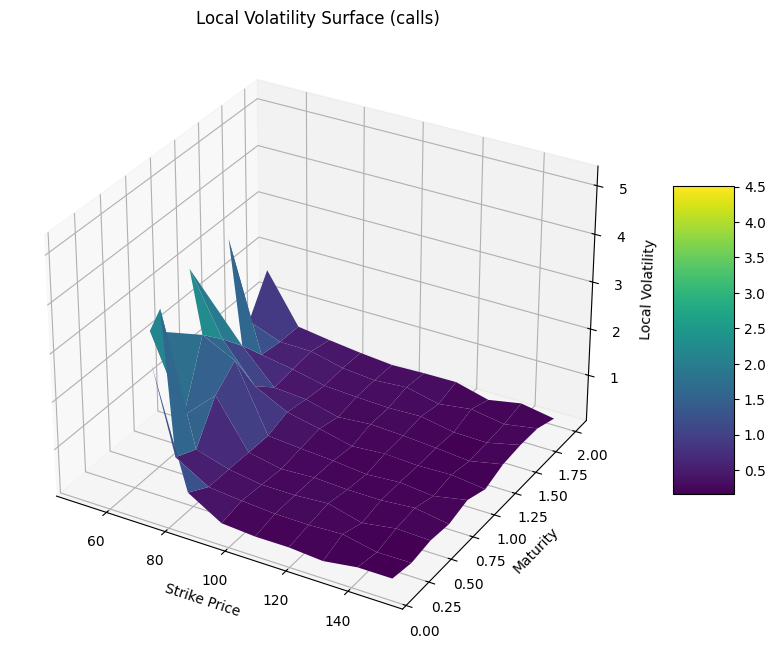

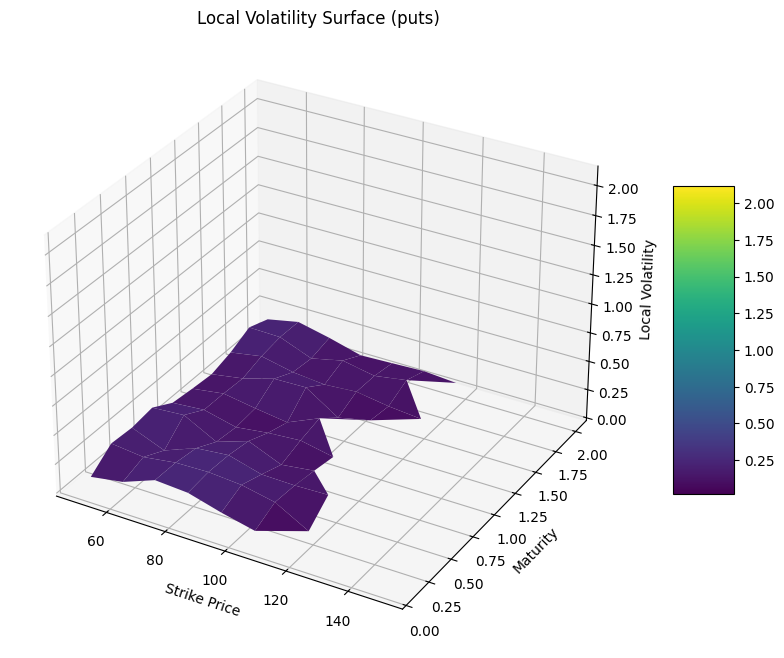

In [6]:
K = np.linspace(50, 150, 10)  
T = np.linspace(0.1, 2, 10)   
S = 100  
r = 0.05 
sigma = np.random.rand(len(T), len(K)) * 0.2 + 0.1  

local_vol_calls = local_volatility(K, T, S, r, sigma, option_type='call')

local_vol_puts = local_volatility(K, T, S, r, sigma, option_type='put')


plot_local_vol_surface(K, T, local_vol_calls, option_type='call')

plot_local_vol_surface(K, T, local_vol_puts, option_type='put')
